# Titanic Dataset

![Titanic&Python](ImagenInicio.png?raw=true)

A lo largo de esta práctica analizaremos el set de datos del Titanic. En la [web de Kaggle](https://www.kaggle.com/c/titanic) podremos encontrar más información sobre las diferentes variables que contiene el dataset. 

El objetivo de la práctica será responder a la pregunta: **¿Qué factores influyeron en la supervivencia de los pasajeros?**

La práctica constará de las siguientes fases:
 1. Primeros pasos con el dataset
 2. Exploración del dataset y generación de estadísticas
 3. Presentación de resultados
 
 Y si tenemos tiempo para más, construiremos un modelo en base a nuestras conclusiones para predecir la supervivencia. Compararemos nuestro modelo con un árbol de decisión que generaremos a partir del dataset.
 
**IMPORTANTE**: este documento esta escrito utilizando notación markdown. Aquí teneis un buen [manual](https://daringfireball.net/projects/markdown/syntax)

### Primeros pasos con el dataset:
El objetivo de esta sección es que nos familiarizemos con Pandas y seamos capaces de manipular el dataset a nuestro interés.

Lo primero que tendremos cargar son nuestros datos, en este caso en formato ```csv``` en un dataset. [Pandas gestiona múltiples inputs/outputs](http://pandas.pydata.org/pandas-docs/stable/io.html) con lo cual tendremos que usar el específico para este caso: [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) donde definiremos el separador y el path del fichero (el resto de parámetros no será necesario tocarlos en este caso):

In [1]:
import pandas

input_file = 'titanic_data.csv'
separador = ","
dataset = pandas.read_csv(filepath_or_buffer=input_file, sep=separador)

Ya tenemos nuestra variable ```dataset``` con todo el dataset cargado en memoria. Para empezar a explorar nuestro dataset vamos a utilizar algunos [procesos de Pandas](http://pandas.pydata.org/pandas-docs/stable/basics.html). Por ejemplo, respondamos a las siguientes preguntas:
 * ¿Cuantas filas y columnas contiene el dataset?
 * ¿Cual es el nombre de las columnas que incluye el dataset?
 * ¿Qué información contiene la primera fila del dataset?¿Y la última?
 Para contestar a estas preguntas utilizaremos las funciones ```.shape```, ```.columns```, ```.head()``` y ```.tail()```

In [2]:
print "El numero de filas y columnas que incluye el dataset es: ",dataset.shape
print "\nLos nombres de las columnas son: \n",dataset.columns
print "\nLa primera fila del dataset es: \n",dataset.head(1)
print "\nLa última fila del dataset es: \n",dataset.tail(1)

El numero de filas y columnas que incluye el dataset es:  (1045, 12)

Los nombres de las columnas son: 
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

La primera fila del dataset es: 
   PassengerId  Survived  Pclass                     Name   Sex  Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male   22      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  

La última fila del dataset es: 
      PassengerId  Survived  Pclass                          Name   Sex   Age  \
1044         1307         0       3  Saether, Mr. Simon Sivertsen  male  38.5   

      SibSp  Parch              Ticket  Fare Cabin Embarked  
1044      0      0  SOTON/O.Q. 3101262  7.25   NaN        S  


A continuación una descripción de las distintas columnas obtenida de la web de [Kaggle](https://www.kaggle.com/c/titanic/data)

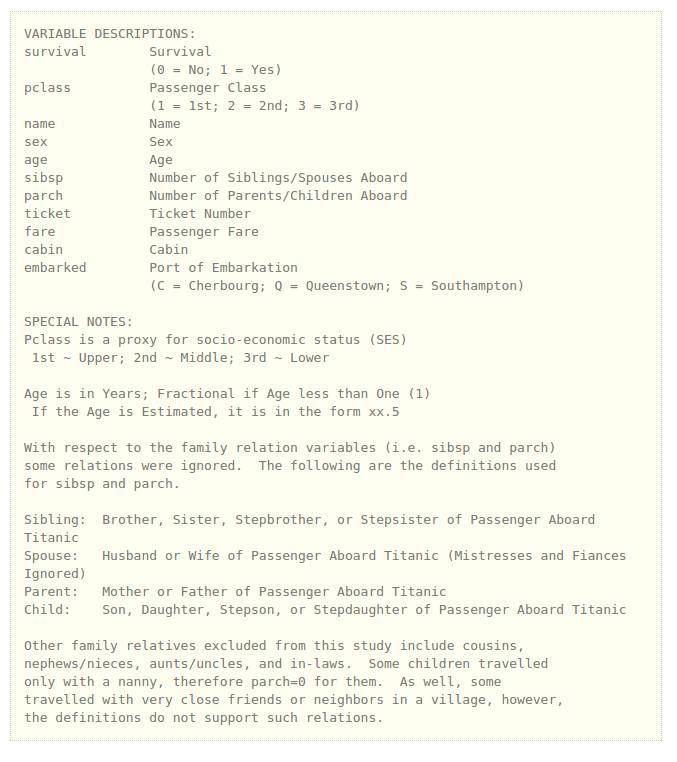

In [3]:
from IPython.display import Image
Image(filename='DescripcionVariablesKaggle.png') 

Ahora vamos a aprender a manejarnos con nuestro dataset, para ello vamos a utilizar distintas técnicas que se describen perfectamente en la [documentación](http://pandas.pydata.org/pandas-docs/stable/indexing.html). Para aprender a manejarnos con estas técnicas vamos a utilizar otro dataframe de ejemplo:

In [4]:
import numpy as np

df1 = pandas.DataFrame(np.random.randn(6,4),index=list(range(0,12,2)),columns=list(range(10,18,2)))

Como podéis comprobar he generado una matriz de datos con valores aleatorios: ```np.random.randn(6,4)```, he definido un índice: ```list(range(0,12,2))``` que es una lista de valores pares entre 0 y 10 y columnas que son otro rango de pares entre 10 y 16:

In [5]:
print df1

          10        12        14        16
0  -0.293310 -0.476037  0.001429  2.150960
2   0.782404 -0.197252 -0.130701  0.255575
4  -0.421546 -0.467541 -0.280136  0.235312
6  -1.655100  0.726611 -1.167439 -0.198073
8  -0.239959  2.113411 -0.419799 -1.557236
10 -1.044362 -1.054325 -0.687125 -0.365443


En esta primera parte utilizaremos las funciones ```.loc``` e ```.iloc``` para seleccionar subconjuntos de nuestro dataset. Tanto ```.loc``` como ```.iloc``` operan sobre el índice, pero mientras que **```.loc``` hace referencia a posiciones, ```.iloc``` se refiere a etiquetas**:

In [6]:
# Seleciona la fila en la posición 2 (recuerda que en python las series empiezan en cero!)
print df1.iloc[2]

10   -0.421546
12   -0.467541
14   -0.280136
16    0.235312
Name: 4, dtype: float64


Como podemos ver, se devuelve la tercera fila (fila 1 corresponde a 0) del dataframe

In [7]:
# Seleciona la fila en cuyo índice es 2
print df1.loc[2]

10    0.782404
12   -0.197252
14   -0.130701
16    0.255575
Name: 2, dtype: float64


En este caso, se devuelve la fila cuyo índice es igual a 2.

Podemos hacer seleciones más complejas incluyendo un rango de índices y ciertas columnas, por ejemplo:

In [8]:
# Seleciona la filas cuyos indices valen 2 y 8 y las columnas 12 y 16
print df1.loc[[2,8],[12,16]]

         12        16
2 -0.197252  0.255575
8  2.113411 -1.557236


In [9]:
# Seleciona todas las filas hasta la que vale 4 y las columnas hasta la 12
print df1.loc[:4,:12]

         10        12
0 -0.293310 -0.476037
2  0.782404 -0.197252
4 -0.421546 -0.467541


In [10]:
# Seleciona las 4 primeras filas y las tres primeras columnas
print df1.iloc[:4,:3]

         10        12        14
0 -0.293310 -0.476037  0.001429
2  0.782404 -0.197252 -0.130701
4 -0.421546 -0.467541 -0.280136
6 -1.655100  0.726611 -1.167439


Ahora que tenemos claro el uso de ```.loc``` e ```.iloc``` (espero!), vamos a operar con nuestro dataset. Por ejemplo vamos a seleccionar las columnas: Name, Sex, Age y las filas de la 3 a la 5 (recordar que en nuestro dataset la primera fila tiene asociado el índice 1 y así sucesivamente:

In [11]:
print "Imprimir las filas 3 a 5 y columnas Name, Sex, Age\n", dataset.loc[[3,4,5],['Name','Sex','Age']]

Imprimir las filas 3 a 5 y columnas Name, Sex, Age
                                           Name     Sex  Age
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35
4                      Allen, Mr. William Henry    male   35
5                       McCarthy, Mr. Timothy J    male   54


Sin embargo, ahora quiero seleccionar las 4 primeras filas del dataset y la tercera y cuarta columnas:

In [12]:
print "Imprimir las 4 primeras filas y columnas tercera y cuarta\n", dataset.iloc[:4,[2,3]]

Imprimir las 4 primeras filas y columnas tercera y cuarta
   Pclass                                               Name
0       3                            Braund, Mr. Owen Harris
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2       3                             Heikkinen, Miss. Laina
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)


Perfecto!, ya sabemos seleccionar filas y columnas!, ahora el objetivo es hacer modificaciones. Por ejemplo cambiemos a Allen, Mr. William Henry su edad (actualmente 54 años) por 260. Para ello tendremos que seleccionar la fila en la que la columna 'Name' sea igual a 'Allen, Mr. William Henry', de la siguiente manera:

In [13]:
print "Edad de Allen, Mr. William Henry:\n ", dataset.loc[dataset['Name'].isin(['Allen, Mr. William Henry']),'Age']

Edad de Allen, Mr. William Henry:
  4    35
Name: Age, dtype: float64


Para modificar este valor, tendremos que asignarle el que queremos (260):

In [14]:
# Asignar nueva edad al pobre Allen:
dataset.loc[dataset['Name']=='Allen, Mr. William Henry','Age'] = 260

¿Cual es ahora la edad de Allen?

In [15]:
print "La nueva edad de Allen, Mr. William Henry:\n ", dataset.loc[dataset['Name']=='Allen, Mr. William Henry','Age']

La nueva edad de Allen, Mr. William Henry:
  4    260
Name: Age, dtype: float64


Como vemos, ya hemos editado su edad!. Aunque le devolveremos a los 54 años, a estas alturas ya sabemos seleccionar subsets de datos y editarlos si lo necesitamos.

In [16]:
# Devolvamos a Allen su edad:
dataset.loc[dataset['Name']=='Allen, Mr. William Henry','Age'] = 54

### Exploración del dataset y generación de estadísticas
¿Qué sabemos por ahora de nuestros datos? Practicamente nada!. Vamos a utilizar una serie de funciones que se incluyen en Pandas para obtener facilmente valiosa información de los mismos. 

El primera información que se ha de obtener cuando por primera vez se trabaja con un dataset es la cantidad de ```NAN``` incluidos en el mismo, para ello utilizaremos la función ```.info()``` de Pandas:

In [17]:
# Obtener información sobre el número de valores NAN que se incluyen en el dataset:
print dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1044
Data columns (total 12 columns):
PassengerId    1045 non-null int64
Survived       1045 non-null int64
Pclass         1045 non-null int64
Name           1045 non-null object
Sex            1045 non-null object
Age            1045 non-null float64
SibSp          1045 non-null int64
Parch          1045 non-null int64
Ticket         1045 non-null object
Fare           1045 non-null float64
Cabin          272 non-null object
Embarked       1043 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 106.1+ KB
None


¿Qué columnas incluyen valores nulos?: Cabin incluye 272 valores no NAN y Embarked 2 NANs

Como podemos ver el dataset es bastante completo a excepción de estas 2 columnas. Para vuestra referencia, Pandas incluye valiosa [documentación](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) para manejar ```NAN```. Aquí no vamos a entrar a manejar estos valores, pero tener en cuenta esta información!.

Bien, ya sabemos como están distribuidos los huecos en el dataset, pero volvemos a la pregunta de antes: ¿Qué sabemos de la información que contiene el dataset? Seguimos igual, practicamente nada!

OK OK, vamos a empezar a mirar el dataset de manera que podamos responder a nuestra pregunta principal: ¿Qué factores influyeron en la supervivencia del Titanic?

Pues bien, Pandas incluye la función ```.describe()``` la cual permite obtener estadísticas básicas sobre las distintas columans del dataset: 

In [18]:
print "Imprimir estadísticas básicas del dataset: \n", dataset.describe()

Imprimir estadísticas básicas del dataset: 
       PassengerId     Survived       Pclass          Age        SibSp  \
count  1045.000000  1045.000000  1045.000000  1045.000000  1045.000000   
mean    654.990431     0.399043     2.206699    29.870019     0.503349   
std     377.650551     0.489936     0.841542    14.407698     0.912471   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     326.000000     0.000000     1.000000    21.000000     0.000000   
50%     662.000000     0.000000     2.000000    28.000000     0.000000   
75%     973.000000     1.000000     3.000000    39.000000     1.000000   
max    1307.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1045.000000  1045.000000  
mean      0.421053    36.686080  
std       0.840052    55.732533  
min       0.000000     0.000000  
25%       0.000000     8.050000  
50%       0.000000    15.750000  
75%       1.000000    35.500000  
max       6.00000

¿Qué información incluye ```.describe()``` para cada columna? 
 * Número de valores (count)
 * Media (mean)
 * Desviacion Estandar (std)
 * Valor mínimo (min)
 * Valor máximo (max)
 * Primer percentil (25%)
 * Mediana (50%)
 * Tercer percentil (75%)

Aquí ya tenemos información útil!!!, ya podemos responder a las siguientes preguntas:
 * ¿Qué porcentaje de supervivientes hubo? 39.9%
 * ¿Cual era la media de edad? 29.8
 * ¿Cual fue el ticket (Fare) más caro pagado?¿Y el que menos? 512.3 y 0.0
 * ¿Cuantas clases (Pclass) incluye el barco?

No echais de menos una columna? 'Sex' no esta incluida en este análisis, porque? Si os fijais en la información de ```.info()``` aquí solo se han incluido las columnas numéricas (float o int64). vamos a echar un vistazo a 'Sex' para entender el formato que tiene:

In [19]:
print dataset.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


Como vemos "male" y "female" son los valores incluidos, comprobemos que estos son los únicos valores que se incluyen para todo el dataset

In [20]:
# Imprimimos todos los valores de Sex en el dataset:
print dataset.Sex.unique()

['male' 'female']


Como este formato nos impide trabajar con la función ```.describe()```, vamos a transformar esta columna en otros valores que nos sean de más utilidad. Para ello definiremos una función en python que asigne 1 a 'female' y 0 a 'male', después utilizaremos la función [Apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) de Pandas para modificar estos valores en el dataset:

In [21]:
# definir functión que haga el cambio:
def gender_number(gender):
    if gender == 'male': return 0.
    return 1.

# Aplicar el cambio a todas las filas con la función Apply:
dataset.Sex = dataset.Sex.apply(lambda x:gender_number(x))

¿Que aspecto tiene ahora 'Sex'?

In [22]:
# Imprimimos todos los valores de Sex en el dataset:
print dataset.Sex.unique()

[ 0.  1.]


Bien!, ejecutemos ahora ```.describe()``` de nuevo sobre la columna 'Sex'

In [23]:
# Obtengamos estadísticas de 'Sex'
print dataset.Sex.describe()

count    1045.000000
mean        0.371292
std         0.483382
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Sex, dtype: float64


Vaya, parece que no ayuda a entender como están distribuidos los sexos? Parece que no. Probemos algo nuevo: [Agregaciones con Pandas!](http://pandas.pydata.org/pandas-docs/stable/groupby.html). Como ejemplo realizaré una agregación para comprobar cuantos hombre y mujeres había en el barco:

In [24]:
# Obtener el recuento de hombres y mujeres en el barco:
print dataset.groupby('Sex').count().iloc[:,1]

Sex
0    657
1    388
Name: Survived, dtype: int64


¿Cuantos hombres y mujeres había? 388 mujeres y 657 hombres

Hagamos una cosa ahora, con el objetivo de entender como están distribuidos los pasajeros por edades vamos a crear una nueva columna llamada 'Age_ranges' que incluya el rango de edad a la que cada pasajero corresponde. El objetivo será obtener cuantos pasajeros hay en el rango [0-10), [10,20) .... 

In [25]:
# Function para generar los rangos de edad:
def age_ranges(x):
    return '[{0}-{1})'.format(10*int(x/10), 10 +10*int(x/10))

# Crear nueva columna:
dataset['Age_ranges'] = np.nan

# Asignar los valores rangos de edad correspondientes:
dataset['Age_ranges'] = dataset.Age.apply(lambda x: age_ranges(x))

# Comprobar que las cosas funcionan como se espera:
print dataset[['Age_ranges','Age']].head(10)

  Age_ranges  Age
0    [20-30)   22
1    [30-40)   38
2    [20-30)   26
3    [30-40)   35
4    [50-60)   54
5    [50-60)   54
6     [0-10)    2
7    [20-30)   27
8    [10-20)   14
9     [0-10)    4


¿Cómo están distribuidos los pasajeros por rangos de edad en el barco?

In [26]:
# Imprimir distribución de rangos de edad en el barco:
print dataset.groupby('Age_ranges').count().iloc[:,1]

Age_ranges
[0-10)      82
[10-20)    143
[20-30)    344
[30-40)    231
[40-50)    135
[50-60)     71
[60-70)     31
[70-80)      7
[80-90)      1
Name: Survived, dtype: int64


¿Cuantos niños menores de 10 años hay incluidos? 82

Y ahora... ¿Quien sabría decir como están distribuidos los pasajeros por edades y sexos?

In [27]:
# Imprimir distribución de rangos de edad en el barco por sexo:
print dataset.groupby(['Sex','Age_ranges']).count().iloc[:,1]

Sex  Age_ranges
0    [0-10)         43
     [10-20)        79
     [20-30)       229
     [30-40)       145
     [40-50)        89
     [50-60)        44
     [60-70)        21
     [70-80)         6
     [80-90)         1
1    [0-10)         39
     [10-20)        64
     [20-30)       115
     [30-40)        86
     [40-50)        46
     [50-60)        27
     [60-70)        10
     [70-80)         1
Name: Survived, dtype: int64


Creo que llegados a este punto, ya no deberíamos tener problemas en sacar los factores que influyeron en la supervivencia de los pasajeros en el Titanic. Por ejemplo, ¿como se distribuyen los supervivientes por sexo?, ¿y por edades, clase, precio del billete, etc?

In [28]:
# Distribución de supervivientes por edades:
print dataset.groupby(['Survived','Age_ranges']).count().iloc[:,1]
# Distribución de supervivientes por sexo:
print dataset.groupby(['Survived','Sex']).count().iloc[:,1]
# Distribución de supervivientes por clase:
print dataset.groupby(['Survived','Pclass']).count().iloc[:,1]


Survived  Age_ranges
0         [0-10)         35
          [10-20)        83
          [20-30)       224
          [30-40)       132
          [40-50)        87
          [50-60)        42
          [60-70)        19
          [70-80)         6
1         [0-10)         47
          [10-20)        60
          [20-30)       120
          [30-40)        99
          [40-50)        48
          [50-60)        29
          [60-70)        12
          [70-80)         1
          [80-90)         1
Name: Pclass, dtype: int64
Survived  Sex
0         0      564
          1       64
1         0       93
          1      324
Name: Pclass, dtype: int64
Survived  Pclass
0         1         114
          2         149
          3         365
1         1         170
          2         112
          3         135
Name: Name, dtype: int64


Bueno, ya tenemos el número de pasajeros que sobrevivieron por edad, sexo y clase, pero lo ideal (y esperado) es tener el porcentage de supervivencia por edad, sexo, clase, etc. 

Por ejemplo, el porcentaje de superviviencia por edades lo podemos calcular de la siguiente manera:

**NOTA**: Un pasajero que sobrevive tiene valor 1, con lo cual, si sobreviven 5 pasajeros de 10, la media será igual al porcentaje de supervivencia.

In [29]:
# Porcentaje de supervivientes por edad:
print dataset.groupby('Age_ranges').mean().loc[:,'Survived']

Age_ranges
[0-10)     0.573171
[10-20)    0.419580
[20-30)    0.348837
[30-40)    0.428571
[40-50)    0.355556
[50-60)    0.408451
[60-70)    0.387097
[70-80)    0.142857
[80-90)    1.000000
Name: Survived, dtype: float64


OK, ¿Cuales son los porcentajes de superviviencia por edades, edades y sexos, y demás combinaciones que se te ocurran? 

In [30]:
# Porcentaje de supervivientes por Sexo:
print dataset.groupby('Sex').mean().loc[:,'Survived']
# Porcentaje de supervivientes por Pclass:
print dataset.groupby('Pclass').mean().loc[:,'Survived']
# Porcentaje de supervivientes por Sexo y edad:
print dataset.groupby(['Sex','Age_ranges']).mean().loc[:,'Survived']
# Porcentaje de supervivientes por Sexo y Pclass:
print dataset.groupby(['Sex','Pclass']).mean().loc[:,'Survived']
# Porcentaje de supervivientes por Sexo y Age_ranges:
print dataset.groupby(['Pclass','Age_ranges']).mean().loc[:,'Survived']

Sex
0    0.141553
1    0.835052
Name: Survived, dtype: float64
Pclass
1    0.598592
2    0.429119
3    0.270000
Name: Survived, dtype: float64
Sex  Age_ranges
0    [0-10)        0.441860
     [10-20)       0.088608
     [20-30)       0.109170
     [30-40)       0.158621
     [40-50)       0.134831
     [50-60)       0.090909
     [60-70)       0.095238
     [70-80)       0.000000
     [80-90)       1.000000
1    [0-10)        0.717949
     [10-20)       0.828125
     [20-30)       0.826087
     [30-40)       0.883721
     [40-50)       0.782609
     [50-60)       0.925926
     [60-70)       1.000000
     [70-80)       1.000000
Name: Survived, dtype: float64
Sex  Pclass
0    1         0.264901
     2         0.094937
     3         0.109195
1    1         0.977444
     2         0.941748
     3         0.638158
Name: Survived, dtype: float64
Pclass  Age_ranges
1       [0-10)        0.500000
        [10-20)       0.772727
        [20-30)       0.673077
        [30-40)       0.694444
    

Ahora si!, ¿Que factores influyeron principalmente en la supervivencia de los pasajeros?
* Genero
* Clase
* Edad

### Presentación de resultados
Cuando se trabaja en ciencia de datos, es muy importante no sólo saber analizar los datos con los que se trabaja y obtener conclusiones, sino también comunicar de una manera efectiva y clara los resultados al resto de participantes para que estos puedan entender las conclusiones y el trabajo realizado. Por esta razón, vamos a generar una serie de gráficas que sirvan para representar de una manera clara y contundente los resultados de nuestro analisis.

El primer tipo de gráficas que vamos a generar van a ser para describir las variables que incluye el dataset, por ejemplo representar como se distribuyen los pasajeros por clases, por sexos, por edades....

[Pandas y Matplotlib](http://pandas.pydata.org/pandas-docs/stable/visualization.html) permiten generar gráficas a partir de los [dataframes](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) con los que hemos estado trabajando.

Por ejemplo, a continuación se muestra una representación con [boxplots](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot) donde podemos ver una información similar a la que la función ```.describe()``` ofrece:

In [31]:
# definir functión que haga el cambio:
def numbertogender(gender):
    if gender == 0.: return 'male'
    return 'female'

# Aplicar el cambio a todas las filas con la función Apply:
dataset.Sex = dataset.Sex.apply(lambda x:numbertogender(x))

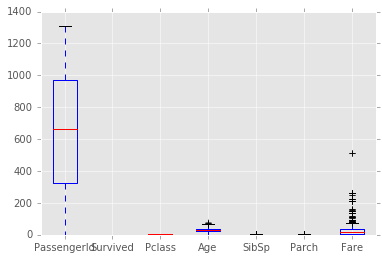

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# Seleccionamos el estilo de las gráficas:
plt.style.use('ggplot')

# Generamos el Boxplot:
dataset.boxplot(return_type='axes')

# Representamos la gráfica:
plt.show()



No parece gran cosa y ademas la columna PassengerId descompensa el eje y, vamos a mejorar el estilo de la gráfica:

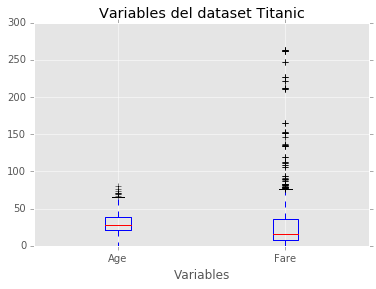

In [33]:
# Generamos el Boxplot, quitando la columna 'PassengerId','Survived','Pclass','SibSp','Parch':
dataset.loc[:,~dataset.columns.isin(['PassengerId','Survived','Pclass','SibSp','Parch'])].boxplot(return_type='axes')

# Añadimos título y etiquetas:
plt.title('Variables del dataset Titanic')
plt.xlabel('Variables')
plt.ylim([0,300])

# Representamos la gráfica:
plt.show()

¿Qué podemos conclusiones podemos sacar a partir de esta representación?
* Mediana (rojo)
* Primer y tercer quartil
* Outliers

¿Cómo se genera un historgrama de cualquier variable?, A continuación muestro como se genera el histograma de la columna 'Age':

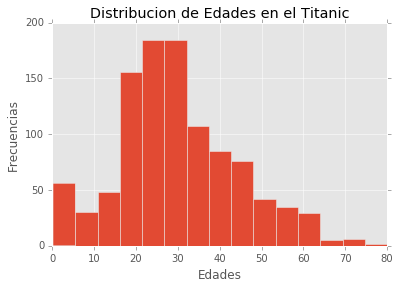

In [34]:
# Generamos el histograma de Age:
dataset.loc[:,'Age'].hist(bins=15)

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')

# Representamos la gráfica:
plt.show()

¿Podrías generar un histograma para la columna ```Fare```?

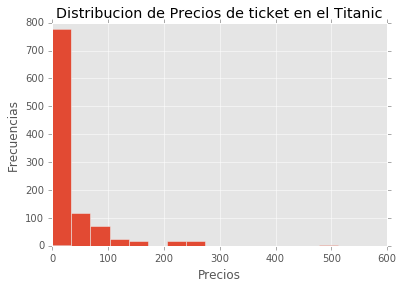

In [35]:
# Generamos el histograma de Fare:
dataset.loc[:,'Fare'].hist(bins=15)

# Añadimos título y etiquetas:
plt.title('Distribucion de Precios de ticket en el Titanic')
plt.xlabel('Precios')
plt.ylabel('Frecuencias')

# Representamos la gráfica:
plt.show()

¿Podriamos ver como se distribuyen los pasajeros por edades y por otra variable (género, supervivencia, clase....)? Echale un vistazo a la documentación!

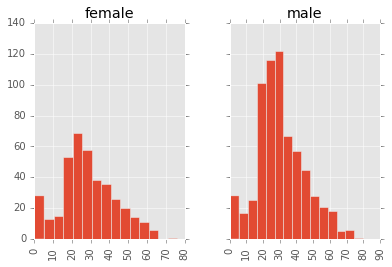

In [36]:
# Generamos el histograma de Age por Sex:
dataset.loc[:,['Age','Sex']].hist(bins=15,by='Sex',sharey=True)

# Representamos la gráfica:
plt.show()

Otra opción es:

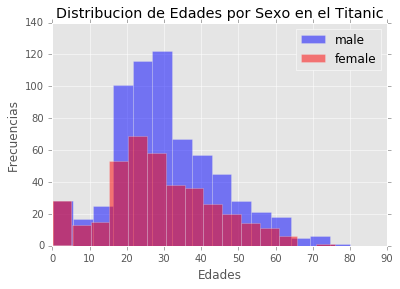

In [37]:
# Generamos el histograma de Age por Sex:
dataset.loc[dataset.Sex=='male','Age'].hist(bins=15,color='blue',alpha=0.5,label='male')
dataset.loc[dataset.Sex=='female','Age'].hist(bins=15,color='red',alpha=0.5,label='female')

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades por Sexo en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')
plt.legend()

# Representamos la gráfica:
plt.show()

¿Cómo se distribuyen los pasajeros por edad y por clase? (selecciones [colores](http://html-color-codes.info/) para cada una de las clases)

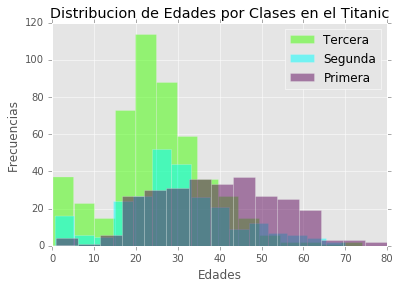

In [38]:
# Generamos el histograma de Age por clase:
dataset.loc[dataset.Pclass==3,'Age'].hist(bins=15,color='#40FF00',alpha=0.5,label='Tercera')
dataset.loc[dataset.Pclass==2,'Age'].hist(bins=15,color='#00FFFF',alpha=0.5,label='Segunda')
dataset.loc[dataset.Pclass==1,'Age'].hist(bins=15,color='#610B5E',alpha=0.5,label='Primera')

# Añadimos título y etiquetas:
plt.title('Distribucion de Edades por Clases en el Titanic')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')
plt.legend()

# Representamos la gráfica:
plt.show()

Ahora vamos a empezar a generar gráficas para demostrar como se distribuyen los supervivientes por Sexo, Clase y Edad. Antes vimos que esta información la obteniamos haciendo agrupaciones sobre el dataset. En este caso repetiremos el proceso y lo representaremos, por ejemplo el siguiente proceso muestra como se distribuyen los pasajeros por sexo y los porcentajes de superviviencia asociados a los mismos:

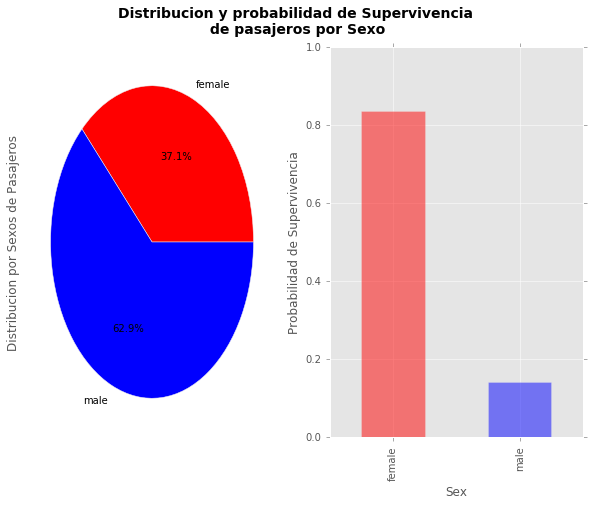

In [39]:
# Vamos a crear una figura con dos subplots:
f, axarr = plt.subplots(1,2,figsize=(10,7))
f.suptitle('Distribucion y probabilidad de Supervivencia\n de pasajeros por Sexo', fontsize=14, fontweight='bold')

# En la gráfica de la izquierda vamos a representar la cantidad de pasajeros por Sexo
dataset.groupby('Sex').count().iloc[:,1].plot.pie(ax=axarr[0],colors=['red','blue'],autopct='%1.1f%%')
axarr[0].set_ylabel('Distribucion por Sexos de Pasajeros')

# En la gráfica de la derecha vamos a representar la probabilidad de superviviencia por Sexo
dataset.groupby('Sex').mean().iloc[:,1].plot.bar(ax=axarr[1],color=['red','blue'],alpha=0.5)
axarr[1].set_ylabel('Probabilidad de Supervivencia')
axarr[1].set_ylim([0,1])

plt.show()

¿Podriamos hacer lo mismo con 'Age_ranges' o 'Pclass'?

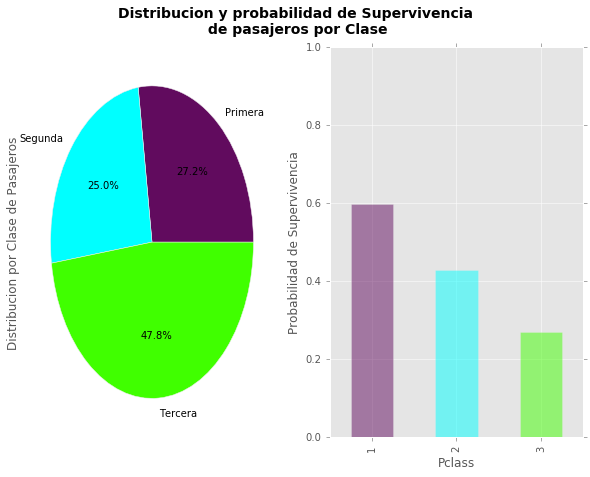

In [40]:
# Vamos a crear una figura con dos subplots:
f, axarr = plt.subplots(1,2,figsize=(10,7))
f.suptitle('Distribucion y probabilidad de Supervivencia\n de pasajeros por Clase', fontsize=14, fontweight='bold')

# En la gráfica de la izquierda vamos a representar la cantidad de pasajeros por Clase
dataset.groupby('Pclass').count().iloc[:,1].plot.pie(ax=axarr[0],labels=['Primera','Segunda','Tercera']\
                                                     ,autopct='%1.1f%%',colors=['#610B5E','#00FFFF','#40FF00'])
axarr[0].set_ylabel('Distribucion por Clase de Pasajeros')

# En la gráfica de la derecha vamos a representar la probabilidad de superviviencia por Clase
dataset.groupby('Pclass').mean().iloc[:,1].plot.bar(ax=axarr[1],color=['#610B5E','#00FFFF','#40FF00']\
                                                    ,alpha=0.5)
axarr[1].set_ylabel('Probabilidad de Supervivencia')
axarr[1].set_ylim([0,1])

plt.show()

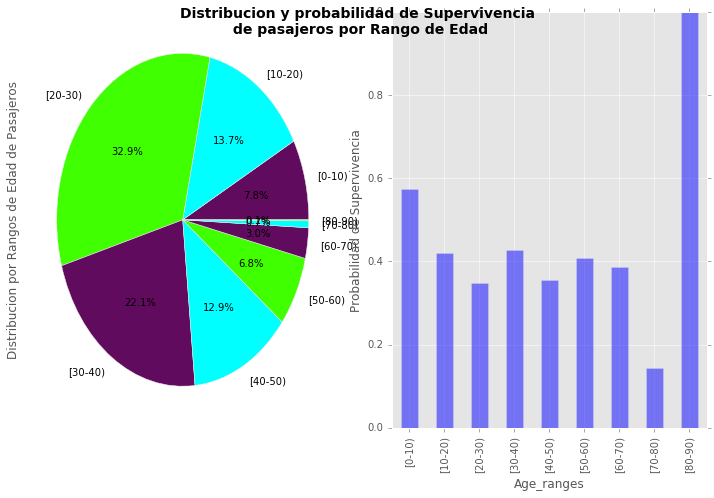

In [41]:
# Vamos a crear una figura con dos subplots:
f, axarr = plt.subplots(1,2,figsize=(10,7))
f.suptitle('Distribucion y probabilidad de Supervivencia\n de pasajeros por Rango de Edad', fontsize=14, fontweight='bold')

# En la gráfica de la izquierda vamos a representar la cantidad de pasajeros por Sexo
dataset.groupby('Age_ranges').count().iloc[:,1].plot.pie(ax=axarr[0],autopct='%1.1f%%',colors=['#610B5E','#00FFFF','#40FF00'])
axarr[0].set_ylabel('Distribucion por Rangos de Edad de Pasajeros')

# En la gráfica de la derecha vamos a representar la probabilidad de superviviencia por Sexo
dataset.groupby('Age_ranges').mean().iloc[:,1].plot.bar(ax=axarr[1],alpha=0.5)
axarr[1].set_ylabel('Probabilidad de Supervivencia')
axarr[1].set_ylim([0,1])

f.tight_layout()
plt.show()

Por último, vamos a comprobar como se distribuye la probabilidad de supervivencia por Sexo y por Clase, para ello, vamos a utilizar la función [pivot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html).

In [42]:
# Este es el dataframe que vamos a representar:
print dataset.groupby(['Sex','Pclass']).mean().reset_index().pivot(index='Pclass',columns='Sex',values='Survived')

Sex       female      male
Pclass                    
1       0.977444  0.264901
2       0.941748  0.094937
3       0.638158  0.109195


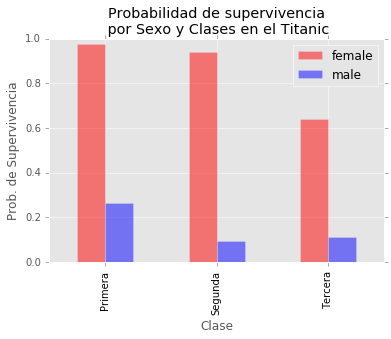

In [43]:
dataset.groupby(['Sex','Pclass']).mean().reset_index().pivot(
    index='Pclass',columns='Sex',values='Survived').plot.bar(color=['red','blue'],alpha=0.5)

# Añadimos título y etiquetas:
plt.title('Probabilidad de supervivencia\n por Sexo y Clases en el Titanic')
plt.xlabel('Clase')
plt.ylabel('Prob. de Supervivencia')
plt.xticks(range(3), ['Primera', 'Segunda', 'Tercera'], color='black')
plt.legend()

plt.show()

Felicidades!, llegados a este punto ya hemos representado visualemente las conclusiones que obtuvimos en un primer momento. Hemos demostrado que la probabilidad de superviviencia viene mayormente determinada por el Sexo, Clase y en menor medida por la Edad (y probablemente sea también factor de otras variables que no hemos analizado en este ejercicio. Podriamos crear un modelo que nos sirviera para saber si un pasajero sobrevive o no?

# Modelización
En esta seción vamos a trabajar en la creación de un modelo que sirva para determinar si un pasajero va a sobrevivir o no. 
Lo primero que haremos será crear nuestro propio modelo en función de las conclusiones que hemos sacado, y después lo compararemos con un [árbol de decision](https://es.wikipedia.org/wiki/Aprendizaje_basado_en_%C3%A1rboles_de_decisi%C3%B3n) que entrenaremos con el dataset.

Lo primero que vamos a definir es el score ```accuracy``` para medir la calidad de nuestros resultados:

In [44]:
def accuracy_score(truth, pred):
    """ Devuelve accuracy score comparando valores predichos (pred) contra reales (truth). """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predicciones tienen un accuracy de {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "El número de predicciones no es igual al numero de valores reales!"

Lo siguiente que vamos a hacer es eliminar la columa 'Survived' del dataset y marcarla como outcome

In [45]:
# 'Survived' será nuestra etiqueta y el valor que queremos predecir:
outcomes = dataset['Survived']
data = dataset.drop(['Survived','Name','Ticket','Cabin','Age_ranges','Embarked','PassengerId'], axis = 1)
data['Sex'] = data['Sex'].apply(lambda x: 1. if x == 'female' else 0.)
# Representar las primeras 5 filas para comprobar los cambios
print data.head()

   Pclass  Sex  Age  SibSp  Parch     Fare
0       3    0   22      1      0   7.2500
1       1    1   38      1      0  71.2833
2       3    1   26      0      0   7.9250
3       1    1   35      1      0  53.1000
4       3    0   54      0      0   8.0500


Podriamos mejorar el siguiente modelo?:

In [46]:

def modelo(data):
    """ Modelo para estimar la probabilidad de supervivencia. """

    predictions = []
    for _, passenger in data.iterrows():
        # Predecir la supervivencia del pasajero (modificar estas lineas como corresponda)
        if passenger['Sex'] == 1:
            predictions.append(1) # 1 significa que el pasajero sobrevive
        else:
            if passenger['Age'] >= 80:
                predictions.append(1) # 1 significa que el pasajero sobrevive
            else:
                predictions.append(0) # 0 significa que el pasajero no sobrevive
    
    # Devolver las predicciones
    return pandas.Series(predictions)

# Crear predicciones
predictions = modelo(data)

# Obtener resultado:
accuracy_score(outcomes, predictions)

'Predicciones tienen un accuracy de 85.07%.'

Por otro lado, vamos a entrenar un [arbol de decision](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) y compararemos sus resultados con los nuestros:

In [49]:
# Crear un conjunto de datos que sirvan entrenar el árbol de decision (train) y un conjunto de datos de validacion (test)
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(outcomes, 1, test_size=0.3, random_state=450)
for train_index, test_index in sss:
    X_train = data.iloc[train_index]
    y_train = outcomes.iloc[train_index]
    X_test = data.iloc[test_index]
    y_test = outcomes.iloc[test_index]
    
# Definir el arbol de decision
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_features=3,max_depth=2)

# Entrenarlo con los datos de train
clf = clf.fit(X_train, y_train)

# Crear predicciones
predictions = clf.predict(X_test)

# Obtener resultado:
accuracy_score(y_test, predictions)

'Predicciones tienen un accuracy de 84.71%.'

Ahora vamos a representar el arbol de decision:

Index([u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare'], dtype='object')


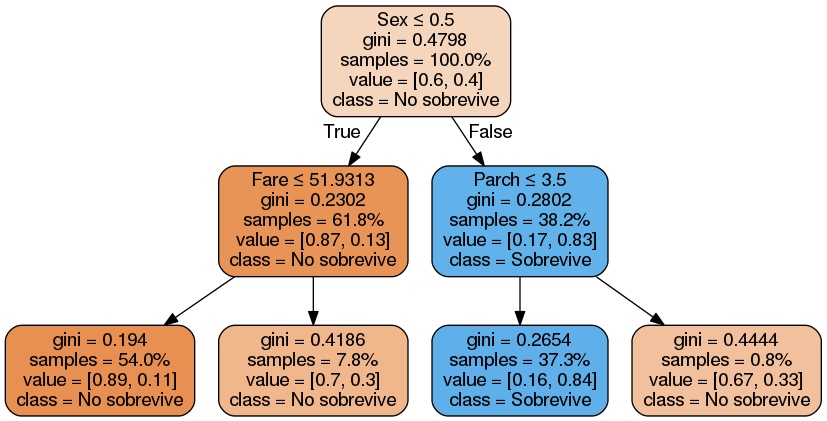

In [53]:
from sklearn.externals.six import StringIO
import pydot 
print data.columns
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=data.columns,
                         class_names=['No sobrevive','Sobrevive'], 
                         filled=True, rounded=True,
                         proportion = True,
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())